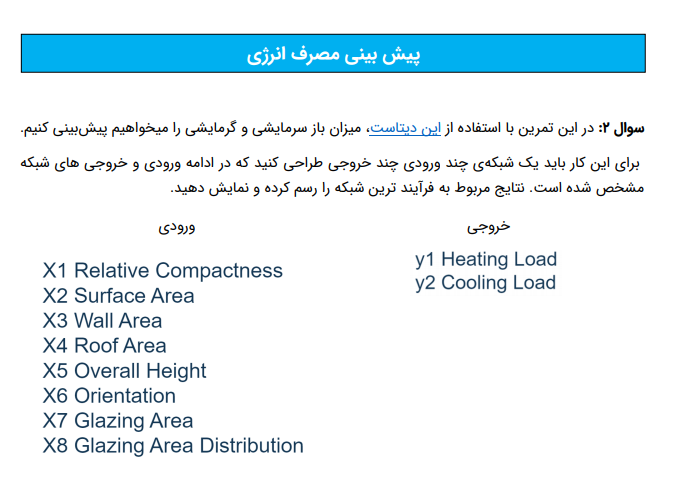

# dataset discription
The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses. It can also be used as a multi-class classification problem if the response is rounded to the nearest integer.

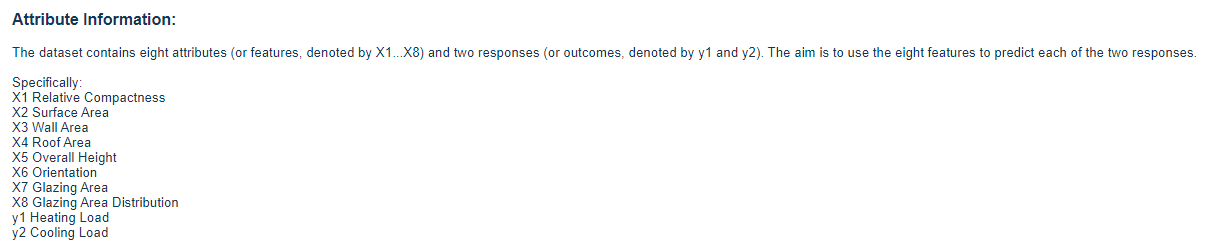

- prefered architecture:

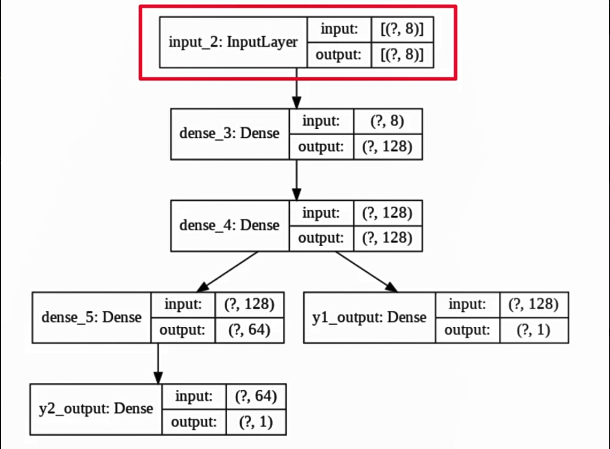

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from pandas import read_excel
file_name = '/content/drive/MyDrive/session2/ENB2012_data.xlsx' # change it to the name of your excel file
df = read_excel(file_name)
df.head(768) # shows headers with top 5 rows

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


- cheak for missing value

In [ ]:
# summarize the shape of the raw data
print('df.shape before dropna:', df.shape)

# Drop the rows where at least one element is missing.
df.dropna(inplace=True)

# summarize the shape of the data with missing rows removed
print('df.shape after dropna:', df.shape)

# sanity check
print(df.index)
print(df.columns)
print(df.values) 

df.loc[4]['X3']
df.iloc[188][8]



df.shape before dropna: (768, 10)
df.shape after dropna: (768, 10)
Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            758, 759, 760, 761, 762, 763, 764, 765, 766, 767],
           dtype='int64', length=768)
Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2'], dtype='object')
[[9.800e-01 5.145e+02 2.940e+02 ... 0.000e+00 1.555e+01 2.133e+01]
 [9.800e-01 5.145e+02 2.940e+02 ... 0.000e+00 1.555e+01 2.133e+01]
 [9.800e-01 5.145e+02 2.940e+02 ... 0.000e+00 1.555e+01 2.133e+01]
 ...
 [6.200e-01 8.085e+02 3.675e+02 ... 5.000e+00 1.644e+01 1.711e+01]
 [6.200e-01 8.085e+02 3.675e+02 ... 5.000e+00 1.648e+01 1.661e+01]
 [6.200e-01 8.085e+02 3.675e+02 ... 5.000e+00 1.664e+01 1.603e+01]]


12.68



---



- prepare data for training(pre-processing)

In [ ]:
from sklearn.model_selection import train_test_split

list_of_x_cols = ['X1','X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']


X_train, X_test, y1_train, y1_test ,y2_train, y2_test = train_test_split(df[list_of_x_cols], df['Y1'], df['Y2'], test_size=0.2)
X_train, X_valid, y1_train, y1_valid, y2_train, y2_valid = train_test_split(X_train, y1_train, y2_train, test_size=0.1)

# sanity cheak
print('X_train and y1_train and y2_train shapes: ', X_train.shape,',', y1_train.shape,',',y2_train.shape)
print('X_test and y1_test and y2_test shapes: ', X_test.shape,',', y1_test.shape,',', y2_test.shape)
print('X_valid and y1_valid and y2_valid shapes: ', X_valid.shape,',', y1_valid.shape,',',y2_valid.shape)


X_train and y1_train and y2_train shapes  (552, 8) , (552,) , (552,)
X_test and y1_test and y2_test shapes  (154, 8) , (154,) , (154,)
X_valid and y_valid shapes  (62, 8) , (62,) , (62,)


- create network architecture

In [ ]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
from tensorflow.keras import layers, models

class ENB():

    @staticmethod
    def build():
        # input
        input_layer = layers.Input((8,))
        
        # Y1 net

        x = layers.Dense(128, activation="relu")(input_layer)
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(0.5)(x)
        x = layers.Dense(128, activation="relu")(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(0.5)(x)
        x = layers.Dense(1)(x)
        Y1_net = layers.Activation("linear", name="Y1_output")(x)

        # Y2 net

        y = layers.Dense(128, activation="relu")(input_layer)
        y = layers.BatchNormalization()(y)
        y = layers.Dropout(0.5)(y)
        y = layers.Dense(128, activation="relu")(y)
        y = layers.BatchNormalization()(y)
        y = layers.Dropout(0.5)(y)
        y = layers.Dense(64, activation="relu")(y)
        y = layers.BatchNormalization()(y)
        y = layers.Dropout(0.5)(y)
        y = layers.Dense(1)(y)
        Y2_net = layers.Activation("linear", name="Y2_output")(y)

       
        net = models.Model(inputs = input_layer,
                           outputs = [Y1_net, Y2_net],
                           name = "ENB")
        
        return net

- train a Network

In [ ]:
fnet = ENB()
net = fnet.build()

#net.summary()


losses = {
        "Y1_output" : "mae",
        "Y2_output" : "mae"
        }

epoch = 1000
loss_weights = {"Y1_output": 1.0, "Y1_output": 1.0 }
metrics = {"Y1_output" :"mae", "Y2_output" :"mae"}

net.compile(optimizer="adam",
            loss = losses, 
            loss_weights = loss_weights,
            metrics = metrics)

H = net.fit(x=X_train,
            y = {"Y1_output": y1_train, "Y2_output": y2_train},
            validation_data=(X_valid,
                             {"Y1_output": y1_valid, "Y2_output": y2_valid}),
            epochs=epoch)


Streaming output truncated to the last 5000 lines.
18/18 [==============================] - 0s 6ms/step - loss: 7.8569 - Y1_output_loss: 3.7193 - Y2_output_loss: 4.1377 - Y1_output_mae: 3.7193 - Y2_output_mae: 4.1377 - val_loss: 6.9292 - val_Y1_output_loss: 3.9994 - val_Y2_output_loss: 2.9298 - val_Y1_output_mae: 3.9994 - val_Y2_output_mae: 2.9298
Epoch 154/100000
18/18 [==============================] - 0s 5ms/step - loss: 7.8184 - Y1_output_loss: 3.8873 - Y2_output_loss: 3.9311 - Y1_output_mae: 3.8873 - Y2_output_mae: 3.9311 - val_loss: 6.1611 - val_Y1_output_loss: 3.2837 - val_Y2_output_loss: 2.8774 - val_Y1_output_mae: 3.2837 - val_Y2_output_mae: 2.8774
Epoch 155/100000
18/18 [==============================] - 0s 5ms/step - loss: 8.2386 - Y1_output_loss: 3.8675 - Y2_output_loss: 4.3711 - Y1_output_mae: 3.8675 - Y2_output_mae: 4.3711 - val_loss: 7.2886 - val_Y1_output_loss: 4.5393 - val_Y2_output_loss: 2.7493 - val_Y1_output_mae: 4.5393 - val_Y2_output_mae: 2.7493
Epoch 156/100000
1

In [ ]:
# Y1 training report

plt.plot(H.history["Y1_output_mae"], label = "train mean-absolute-error")
plt.plot(H.history["val_Y1_output_mae"], label="validation mean absolute error")
plt.xlabel("epochs")
plt.ylabel("mean Absolute error")
plt.legend()
plt.show()
plt.close()

In [ ]:
# Y2 training report
# Y1 training report

plt.plot(H.history["Y2_output_mae"], label = "train mean-absolute-error")
plt.plot(H.history["val_Y2_output_mae"], label="validation mean absolute error")
plt.xlabel("epochs")
plt.ylabel("mean Absolute error")
plt.legend()
plt.show()
plt.close()
